In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', size=16)

# Common Dir/Filenames

In [40]:
# SAC
SAC_ROLLOUT_RETURN_FILENAME = "rollout_return.csv"

# Dynamics
DYNAMICS_OBS_ERROR_FILENAME = "obs_error.csv"
DYNAMICS_REW_ERROR_FILENAME = "rew_error.csv"

# MOPO
MOPO_ENVIRONMENT_FILENAME = "environment.csv"
MOPO_VALUE_SCALE_FILENAME = "value_scale.csv"

# SAC - D3RL001-D3RL003

In [73]:
D3RL001_SAC_RESULTS = "../models/sac/HalfCheetah-v2/2022.05.10-18:13:40/SAC_online_20220510181343"
D3RL002_SAC_RESULTS = "../models/sac/HalfCheetah-v2/2022.05.10-18:13:41/SAC_online_20220510181345"
D3RL003_SAC_RESULTS = "../models/sac/HalfCheetah-v2/2022.05.10-18:13:42/SAC_online_20220510181344"

In [74]:
d3rl001_sac_rollout_return = pd.read_csv(os.path.join(D3RL001_SAC_RESULTS, SAC_ROLLOUT_RETURN_FILENAME), header=None, names='index step return'.split())
d3rl002_sac_rollout_return = pd.read_csv(os.path.join(D3RL002_SAC_RESULTS, SAC_ROLLOUT_RETURN_FILENAME), header=None, names='index step return'.split())
d3rl003_sac_rollout_return = pd.read_csv(os.path.join(D3RL003_SAC_RESULTS, SAC_ROLLOUT_RETURN_FILENAME), header=None, names='index step return'.split())

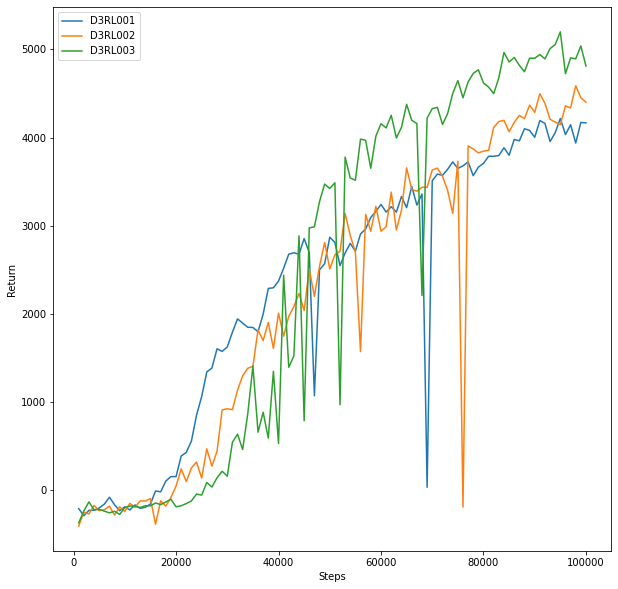

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl001_sac_rollout_return['step'], d3rl001_sac_rollout_return['return'], label='D3RL001')
ax.plot(d3rl002_sac_rollout_return['step'], d3rl002_sac_rollout_return['return'], label='D3RL002')
ax.plot(d3rl003_sac_rollout_return['step'], d3rl003_sac_rollout_return['return'], label='D3RL003')
ax.set_xlabel('Steps')
ax.set_ylabel('Return')
ax.legend()
pass

# Environment Dynamics Model - D3RL004

In [41]:
D3RL004_DYNAMICS_RESULTS_DIR = "../models/dynamics/sac/HalfCheetah-v2/sac_2022.05.10-18:13:40/data_2022.05.11-11:17:04/2022.05.12-17:56:07/ProbabilisticEnsembleDynamics_20220512175607"

In [42]:
d3rl004_dynamics_obs_error = pd.read_csv(os.path.join(D3RL004_DYNAMICS_RESULTS_DIR, DYNAMICS_OBS_ERROR_FILENAME), header=None, names='index step mean_ep_reward'.split())
d3rl004_dynamics_rew_error = pd.read_csv(os.path.join(D3RL004_DYNAMICS_RESULTS_DIR, DYNAMICS_REW_ERROR_FILENAME), header=None, names='index step mean_ep_reward'.split())

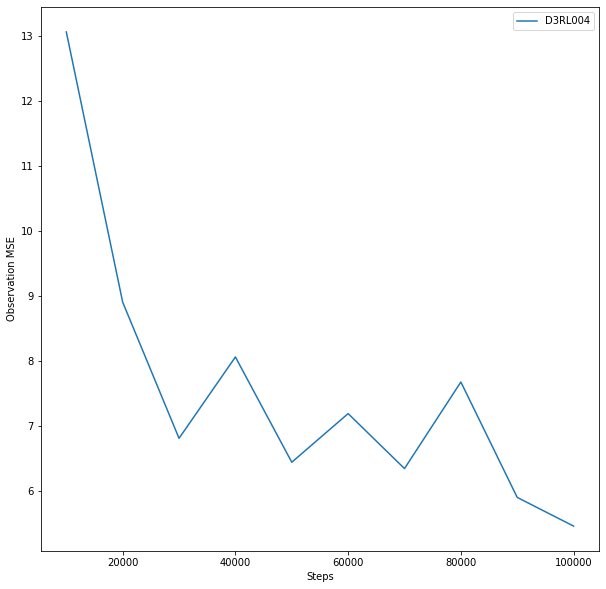

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl004_dynamics_obs_error['step'], d3rl004_dynamics_obs_error['mean_ep_reward'], label='D3RL004')
ax.set_xlabel('Steps')
ax.set_ylabel('Observation MSE')
ax.legend()

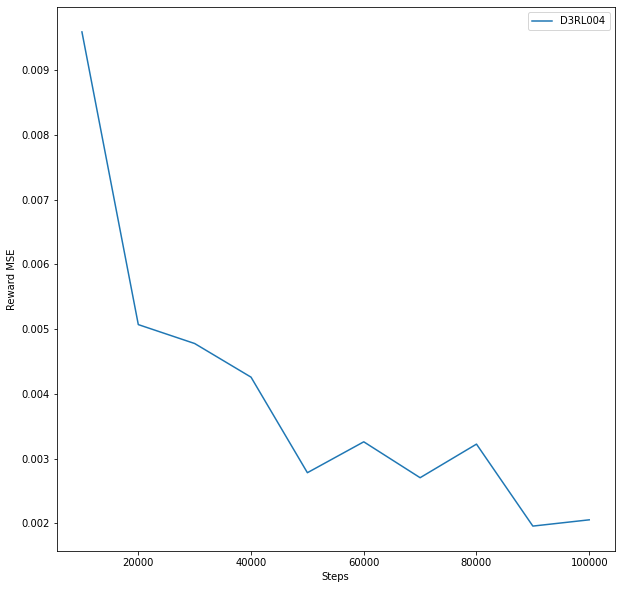

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl004_dynamics_rew_error['step'], d3rl004_dynamics_rew_error['mean_ep_reward'], label='D3RL004')
ax.set_xlabel('Steps')
ax.set_ylabel('Reward MSE')
ax.legend()

# MOPO - D3RL005-D3RL006

In [67]:
D3RL005_MOPO_RESULTS_DIR = "../models/mopo/HalfCheetah-v2/sac_2022.05.10-18:13:40/dynamics_2022.05.12-17:56:07/data_2022.05.11-11:17:04/2022.05.14-12:36:43/MOPO_None_20220514123645"
D3RL006_MOPO_RESULTS_DIR = "../models/mopo/HalfCheetah-v2/sac_2022.05.10-18:13:40/dynamics_2022.05.12-17:56:07/data_2022.05.11-11:17:04/2022.05.14-13:44:51/MOPO_None_20220514134455"

In [68]:
d3rl004_mopo_environment = pd.read_csv(os.path.join(D3RL005_MOPO_RESULTS_DIR, MOPO_ENVIRONMENT_FILENAME), header=None, names='index step mean_ep_reward'.split())
d3rl005_mopo_environment = pd.read_csv(os.path.join(D3RL006_MOPO_RESULTS_DIR, MOPO_ENVIRONMENT_FILENAME), header=None, names='index step mean_ep_reward'.split())

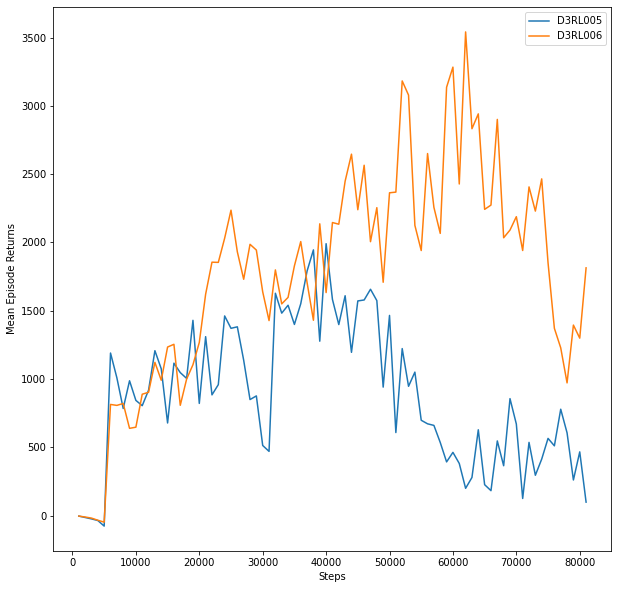

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl004_mopo_environment['step'], d3rl004_mopo_environment['mean_ep_reward'], label='D3RL005')
ax.plot(d3rl005_mopo_environment['step'], d3rl005_mopo_environment['mean_ep_reward'], label='D3RL006')

ax.set_xlabel('Steps')
ax.set_ylabel('Mean Episode Returns')
ax.legend()

# Environment Dynamics Model - D3RL007

In [53]:
D3RL007_DYNAMICS_RESULTS_DIR = "../models/dynamics/SAC-PAP1/HalfCheetah-v2/SAC-PAP1_2022.05.10-18:13:40/data_2022.05.19-11:30:00/2022.05.19-14:34:34/Dynamics_None_20220519143435"

In [54]:
d3rl007_dynamics_obs_error = pd.read_csv(os.path.join(D3RL007_DYNAMICS_RESULTS_DIR, DYNAMICS_OBS_ERROR_FILENAME), header=None, names='index step mean_ep_reward'.split())
d3rl007_dynamics_rew_error = pd.read_csv(os.path.join(D3RL007_DYNAMICS_RESULTS_DIR, DYNAMICS_REW_ERROR_FILENAME), header=None, names='index step mean_ep_reward'.split())

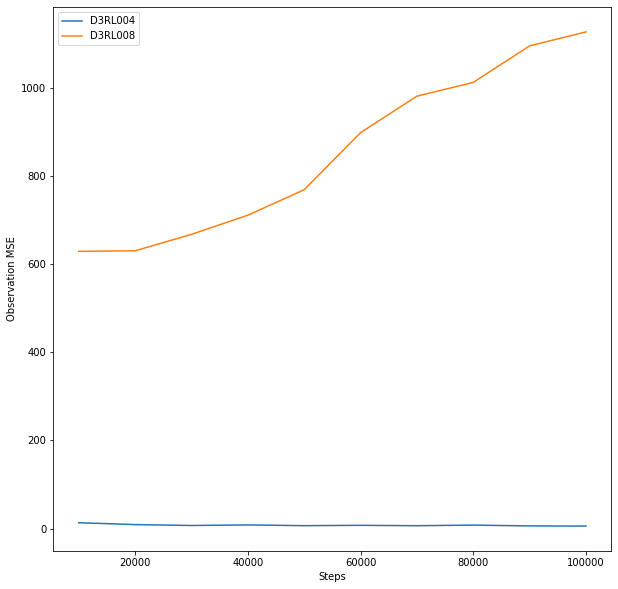

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl004_dynamics_obs_error['step'], d3rl004_dynamics_obs_error['mean_ep_reward'], label='D3RL004')
ax.plot(d3rl007_dynamics_obs_error['step'], d3rl007_dynamics_obs_error['mean_ep_reward'], label='D3RL008')
ax.set_xlabel('Steps')
ax.set_ylabel('Observation MSE')
ax.legend()
pass

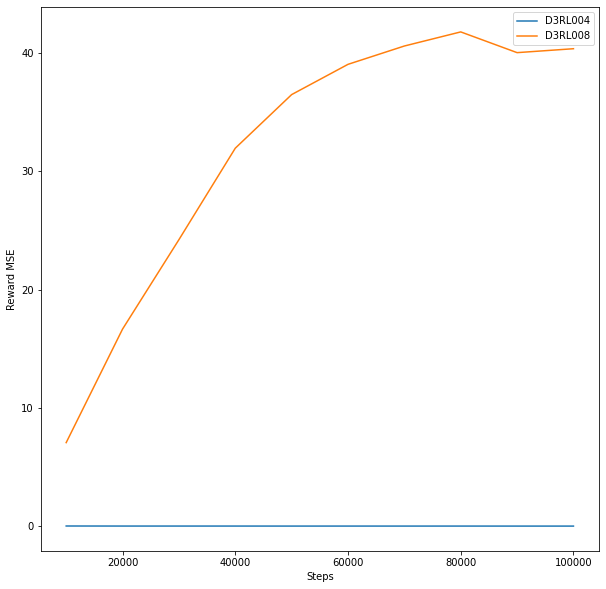

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl004_dynamics_rew_error['step'], d3rl004_dynamics_rew_error['mean_ep_reward'], label='D3RL004')
ax.plot(d3rl007_dynamics_rew_error['step'], d3rl007_dynamics_rew_error['mean_ep_reward'], label='D3RL008')
ax.set_xlabel('Steps')
ax.set_ylabel('Reward MSE')
ax.legend()
pass

# MOPO - D3RL008

In [63]:
D3RL008_MOPO_RESULTS_DIR = "../models/mopo/HalfCheetah-v2/SAC-PAP1_2022.05.10-18:13:40/dynamics_2022.05.19-14:34:34/data_2022.05.19-11:30:00/2022.05.19-15:24:10/MOPO_None_20220519152413"

In [64]:
d3rl008_mopo_environment = pd.read_csv(os.path.join(D3RL008_MOPO_RESULTS_DIR, MOPO_ENVIRONMENT_FILENAME), header=None, names='index step mean_ep_reward'.split())

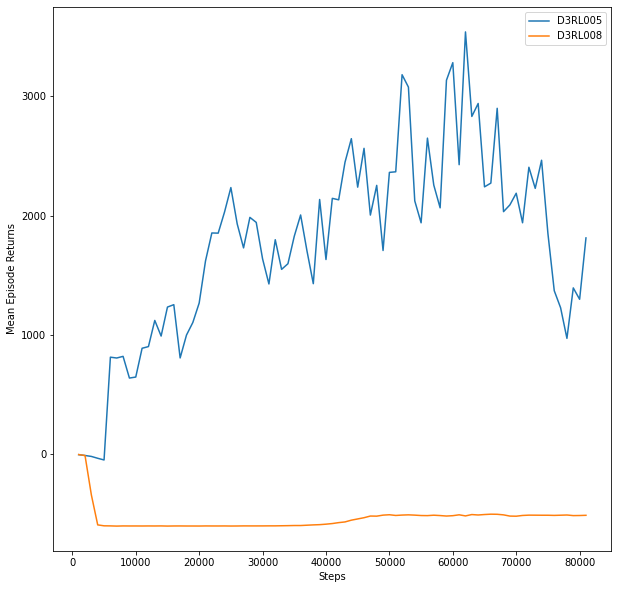

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl005_mopo_environment['step'], d3rl005_mopo_environment['mean_ep_reward'], label='D3RL005')
ax.plot(d3rl008_mopo_environment['step'], d3rl008_mopo_environment['mean_ep_reward'], label='D3RL008')
ax.set_xlabel('Steps')
ax.set_ylabel('Mean Episode Returns')
ax.legend()
pass

# SAC - D3RL009

In [75]:
D3RL009_SAC_RESULTS = "../models/sac/HalfCheetah-v2/2022.05.20-14:24:10/SAC_None_20220520142412"

In [76]:
d3rl009_sac_rollout_return = pd.read_csv(os.path.join(D3RL009_SAC_RESULTS, SAC_ROLLOUT_RETURN_FILENAME), header=None, names='index step return'.split())

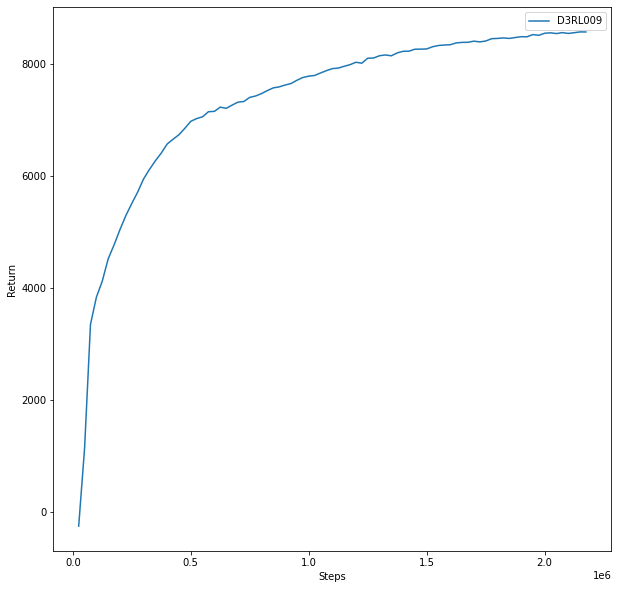

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl009_sac_rollout_return['step'], d3rl009_sac_rollout_return['return'], label='D3RL009')
ax.set_xlabel('Steps')
ax.set_ylabel('Return')
ax.legend()
pass

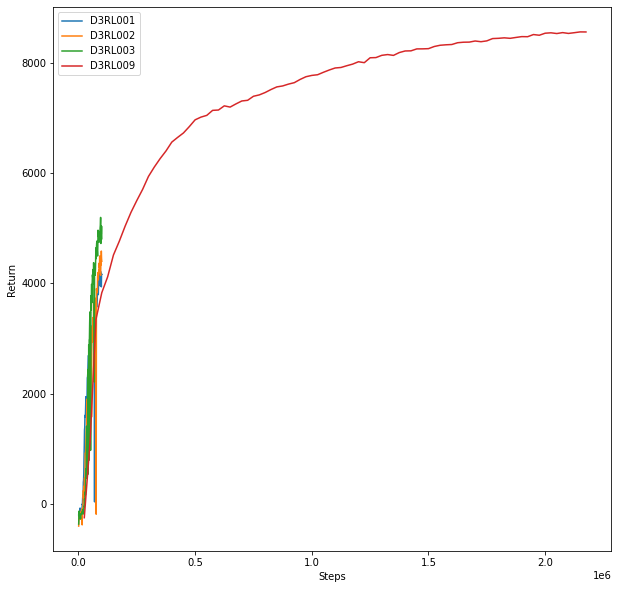

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rl001_sac_rollout_return['step'], d3rl001_sac_rollout_return['return'], label='D3RL001')
ax.plot(d3rl002_sac_rollout_return['step'], d3rl002_sac_rollout_return['return'], label='D3RL002')
ax.plot(d3rl003_sac_rollout_return['step'], d3rl003_sac_rollout_return['return'], label='D3RL003')
ax.plot(d3rl009_sac_rollout_return['step'], d3rl009_sac_rollout_return['return'], label='D3RL009')
ax.set_xlabel('Steps')
ax.set_ylabel('Return')
ax.legend()
pass